# Self-Drive Cars' Sentiment Analysis
13.01.2020



In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hassansherwani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import spacy 

nlp = spacy.load("en_core_web_sm") # preload model

In [4]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2)-Loading data

In [5]:
#filename='tweets.csv'

In [6]:
#df = pd.read_csv(filename, delimiter='\t', header=None,names=['TWEET ID','TIMESTAMP','UTC DATE','USER ID','SCREEN NAME','NAME','Q','TEXT'])

In [7]:
#df_label=df[['TEXT','UTC DATE']]

### save file as pickle

In [8]:
#import pickle
#df_label.to_pickle('entity_data.pkl')
#df_label.to_csv('entity_data.csv',index=False)

### Loading saved csv file

In [9]:
filename='entity_data.csv'

In [10]:
l=pd.read_csv('entity_data.csv')
l.shape

(455728, 2)

In [11]:
l.head()

,TEXT,UTC DATE
0,TEXT,UTC DATE
1,"Another reason I failed in love is I'm poor,I ...",2018-07-31 23:13:47
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,2018-07-31 23:30:00
3,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45
4,Come see Mercedes Benz stadium in Atlanta...,2018-07-31 23:02:25


**convert this datatime to month or year **

# 3)- Getting organization names

### 3.1)- Start with Google

#### Experiment

In [12]:
list_company = ['Google']

In [13]:
for company in list_company:
    l[company] = l.astype(str).sum(axis=1).str.contains(company)

In [14]:
l.head()

,TEXT,UTC DATE,Google
0,TEXT,UTC DATE,False
1,"Another reason I failed in love is I'm poor,I ...",2018-07-31 23:13:47,False
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,2018-07-31 23:30:00,False
3,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45,False
4,Come see Mercedes Benz stadium in Atlanta...,2018-07-31 23:02:25,False


In [15]:
l.Google.value_counts()

False    448641
True       7087
Name: Google, dtype: int64

In [16]:
len(l.loc[l.TEXT.str.contains('Google',na=False)])

7087

In [17]:
l.loc[l.TEXT.str.contains('Google',na=False)]

,TEXT,UTC DATE,Google
433,Self-driving taxis will take half of US drivin...,2018-10-14 00:34:15,True
463,Companies outside of #tech have a key advantag...,2018-10-28 14:07:20,True
913,"Must hold CNN, Apple, Google's feet 2 the fire...",2016-11-02 16:20:30,True
1060,Soooo maybe Google is building its own self-dr...,2016-02-13 03:05:22,True
1066,"Exclusive: In boost to self-driving cars, U.S....",2016-02-13 10:40:27,True
...,...,...,...
453475,"Apple joins Tesla, Google, BMW, Ford, Honda an...",2017-04-19 00:01:01,True
454174,"IBM is your dad, and Google is his younger bro...",2016-11-29 23:02:07,True
454474,#SEO #entrepreneur Sell #1PH #electric #motors...,2016-03-15 17:06:06,True
454499,"Interesting to me that Google, Lyft, General M...",2016-03-15 20:02:13,True


#### Experiment round 2

To add 1 and 0

In [18]:
l['google'] = l['TEXT'].str.contains('Google', case=False).astype(int)

In [19]:
l.head()

,TEXT,UTC DATE,Google,google
0,TEXT,UTC DATE,False,0
1,"Another reason I failed in love is I'm poor,I ...",2018-07-31 23:13:47,False,0
2,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,2018-07-31 23:30:00,False,0
3,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45,False,0
4,Come see Mercedes Benz stadium in Atlanta...,2018-07-31 23:02:25,False,0


In [20]:
l.google.value_counts()

0    446996
1      8732
Name: google, dtype: int64

##### converting int into name of company

### 3.2)- Tesla

In [21]:
l['tesla'] = l['TEXT'].str.contains('Tesla', case=False).astype(int)

In [22]:
l.tesla.value_counts()

0    433127
1     22601
Name: tesla, dtype: int64

### 3.3)-General Motors

In [23]:
l['gm'] = l['TEXT'].str.contains('General Motors', case=False).astype(int)

In [24]:
l.gm.value_counts()

0    424017
1     31711
Name: gm, dtype: int64

### 3.4)-Apple

In [25]:
l['apple'] = l['TEXT'].str.contains('Apple', case=False).astype(int)

In [26]:
l.apple.value_counts()

0    451229
1      4499
Name: apple, dtype: int64

### 3.5)-Ford

In [27]:
l['ford'] = l['TEXT'].str.contains('Ford', case=False).astype(int)

In [28]:
l.ford.value_counts()

0    437204
1     18524
Name: ford, dtype: int64

### 3.6)-Daimler-Benz

In [29]:
l['daimler-benz'] = l['TEXT'].str.contains('Daimler-Benz', case=False).astype(int)

In [30]:
l['daimler-benz'].value_counts()

0    455677
1        51
Name: daimler-benz, dtype: int64

### 3.7)-Volkswagen

In [31]:
l['volkswagen'] = l['TEXT'].str.contains('Volkswagen', case=False).astype(int)

In [32]:
l.volkswagen.value_counts()

0    437404
1     18324
Name: volkswagen, dtype: int64

### 3.8)-BMW

In [33]:
l['bmw'] = l['TEXT'].str.contains('BMW', case=False).astype(int)

In [34]:
l.bmw.value_counts()

0    384434
1     71294
Name: bmw, dtype: int64

### 3.9)-Audi

In [35]:
l['audi'] = l['TEXT'].str.contains('Audi', case=False).astype(int)

In [36]:
l.audi.value_counts()

0    409962
1     45766
Name: audi, dtype: int64

### 3.10)-Porsche

In [37]:
l['porsche'] = l['TEXT'].str.contains('Porsche', case=False).astype(int)

In [38]:
l.porsche.value_counts()

0    390481
1     65247
Name: porsche, dtype: int64

### 3.11)-Opel

In [39]:
l['opel'] = l['TEXT'].str.contains('Opel', case=False).astype(int)

In [40]:
l.opel.value_counts()

0    454788
1       940
Name: opel, dtype: int64

### 3.12)-Waymo

In [41]:
l['waymo'] = l['TEXT'].str.contains('Waymo', case=False).astype(int)

In [42]:
l.waymo.value_counts()

0    452116
1      3612
Name: waymo, dtype: int64

### 3.13)-Aptiv

In [43]:
l['aptiv'] = l['TEXT'].str.contains('Aptiv', case=False).astype(int)

In [44]:
l.aptiv.value_counts()

0    455478
1       250
Name: aptiv, dtype: int64

### 3.14)-Intel-Mobileye

In [45]:
l['intel'] = l['TEXT'].str.contains('Intel', case=False).astype(int)

In [46]:
l.intel.value_counts()

0    452286
1      3442
Name: intel, dtype: int64

### 3.15)-Baidu

In [47]:
l['baidu'] = l['TEXT'].str.contains('Baidu', case=False).astype(int)

In [48]:
l.baidu.value_counts()

0    455018
1       710
Name: baidu, dtype: int64

### 3.16)-Toyota

In [49]:
l['toyota'] = l['TEXT'].str.contains('Toyota', case=False).astype(int)

In [50]:
l.toyota.value_counts()

0    452658
1      3070
Name: toyota, dtype: int64

### 3.17)-Renault

In [51]:
l['renault'] = l['TEXT'].str.contains('Renault', case=False).astype(int)

In [52]:
l.renault.value_counts()

0    454801
1       927
Name: renault, dtype: int64

### 3.18)-Mitsubishi

In [53]:
l['mitsubishi'] = l['TEXT'].str.contains('Mitsubishi', case=False).astype(int)

In [54]:
l.mitsubishi.value_counts()

0    455530
1       198
Name: mitsubishi, dtype: int64

### 3.19)-Nissan

In [55]:
l['nissan'] = l['TEXT'].str.contains('Nissan', case=False).astype(int)

In [56]:
l.nissan.value_counts()

0    454088
1      1640
Name: nissan, dtype: int64

# 4)-Ploting data


Fig4: Number of tweets about key players

In [57]:
for col in l.columns:
    print( col, ':', len(l[col].unique()))

TEXT : 447443
UTC DATE : 450407
Google : 2
google : 2
tesla : 2
gm : 2
apple : 2
ford : 2
daimler-benz : 2
volkswagen : 2
bmw : 2
audi : 2
porsche : 2
opel : 2
waymo : 2
aptiv : 2
intel : 2
baidu : 2
toyota : 2
renault : 2
mitsubishi : 2
nissan : 2


In [58]:
companies={'Google', 'Tesla','GM','Apple','Ford','Daimler-Benz','Volkswagen','BMW','Audi','Porsche','Opel','Waymo','Aptiv','Intel-MobileEye','Baidu','Toyota','Renault-Mitsubishi-Nissan'}

In [59]:
tweets=[8732,22601,31711,4499,18524,51,18324,71294,45766,65247,940,3612,3442,250,710,3070,927,198,1640]

In [60]:
df_plot = pd.DataFrame({'comp': ['Google', 'Tesla','GM','Apple','Ford','Daimler-Benz','Volkswagen','BMW','Audi','Porsche','Opel','Waymo','Aptiv','Intel-MobileEye','Baidu','Toyota','Renault-Mitsubishi-Nissan'], 
                  'count': [8732,22601,31711,4499,18524,51,18324,71294,45766,65247,940,3612,3442,250,710,3070,2765]}) 

In [61]:
df_plot

,comp,count
0,Google,8732
1,Tesla,22601
2,GM,31711
3,Apple,4499
4,Ford,18524
5,Daimler-Benz,51
6,Volkswagen,18324
7,BMW,71294
8,Audi,45766
9,Porsche,65247


In [62]:
# for ascending order
df_plot=df_plot.sort_values("count", ascending=False)
df_plot

,comp,count
7,BMW,71294
9,Porsche,65247
8,Audi,45766
2,GM,31711
1,Tesla,22601
4,Ford,18524
6,Volkswagen,18324
0,Google,8732
3,Apple,4499
11,Waymo,3612


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

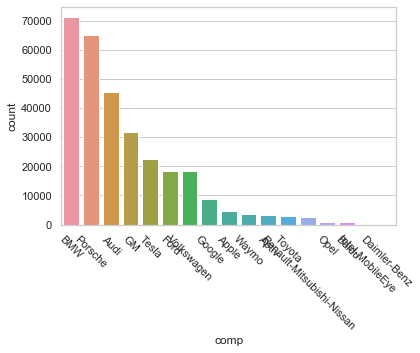

In [63]:
import seaborn as sns
sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.barplot(x="comp", y="count", data=df_plot)
# Rotate x-labels
plt.xticks(rotation=-45)

### better and clear plot

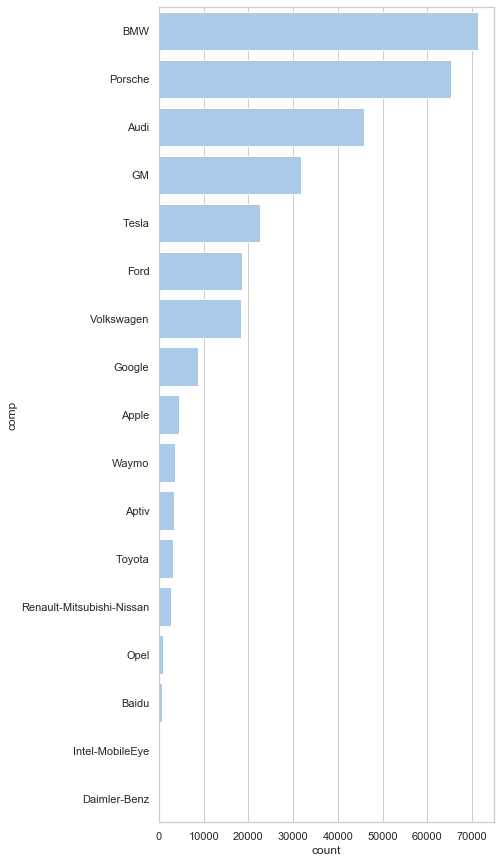

In [64]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="count", y="comp", data=df_plot,
            label="Tweet-Count", color="b")

# 4)-stacking all variables into one columnn

In [65]:
l.columns

Index(['TEXT', 'UTC DATE', 'Google', 'google', 'tesla', 'gm', 'apple', 'ford',
       'daimler-benz', 'volkswagen', 'bmw', 'audi', 'porsche', 'opel', 'waymo',
       'aptiv', 'intel', 'baidu', 'toyota', 'renault', 'mitsubishi', 'nissan'],
      dtype='object')

In [66]:
df=l[['google','tesla','gm']]

In [67]:
df.shape

(455728, 3)

In [68]:
df.head()

,google,tesla,gm
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [69]:
df_stack= df.unstack()

In [70]:
df_stack

google  0         0
        1         0
        2         0
        3         0
        4         0
                 ..
gm      455723    0
        455724    0
        455725    0
        455726    0
        455727    0
Length: 1367184, dtype: int64

In [71]:
df_stack.shape

(1367184,)

In [72]:
pd.DataFrame(df_stack).head(10)

0
google 0  0
       1  0
       2  0
       3  0
       4  0
       5  0
       6  0
       7  0
       8  0
       9  0

In [73]:
combined=pd.DataFrame(df_stack,columns=['label'])

In [74]:
combined.shape

(1367184, 1)